In [144]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [145]:
import catboost as cb

# Print the CatBoost version
print(cb.__version__)


1.2.2


In [146]:
# import data 
df=pd.read_csv('final_data4.csv')


C:\Users\ACER\AppData\Local\Temp\ipykernel_16896\3509187299.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('final_data4.csv')


In [147]:
# Assuming 'df' is your DataFrame and 'old_column_name' is the current name of the column you want to rename
df.rename(columns={'Time_taken (min)': 'Time_taken'}, inplace=True)


In [148]:
df.head(500)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,2024-02-21 21:55:00,2024-02-21 22:10:00,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,2024-02-21 14:55:00,2024-02-21 15:05:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,2024-02-21 17:30:00,2024-02-21 17:40:00,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,2024-02-21 09:20:00,2024-02-21 09:30:00,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,2024-02-21 19:50:00,2024-02-21 20:05:00,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,29,5.0,21.170798,72.790489,21.220798,72.840489,2022-03-21,2024-02-21 22:35:00,2024-02-21 22:45:00,Windy,Low,1,Buffet,scooter,1.0,No,Urban,16
496,33,4.7,12.972532,77.608179,12.992532,77.628179,2022-04-05,2024-02-21 08:30:00,2024-02-21 08:35:00,Fog,Low,2,Drinks,scooter,1.0,No,Metropolitian,18
497,27,4.1,23.359033,85.325347,23.379033,85.345347,2022-03-11,2024-02-21 10:20:00,2024-02-21 10:25:00,Stormy,Low,0,Drinks,motorcycle,0.0,No,Metropolitian,16
498,0,4.7,17.426228,78.407495,17.556228,78.537495,2022-03-12,2024-02-21 15:05:00,2024-02-21 17:50:00,Windy,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,24


In [149]:
# Assuming df is your DataFrame and 'Time_taken (min)' is the column containing NaN values
df.dropna(subset=['Time_taken'], inplace=True)


In [150]:
df['Time_taken'].unique()

array([46, 23, 21, 20, 41, 33, 40, 15, 36, 26, 39, 34, 18, 38, 47, 12, 22,
       25, 35, 30, 10, 19, 11, 28, 52, 16, 27, 49, 24, 17, 14, 37, 44, 42,
       31, 13, 29, 50, 43, 48, 32, 54, 53, 45, 51, '19', '31', '42', '27',
       '12', '24', '26', '15', '22', '39', '40', '34', '21', '29', '33',
       '13', '30', '25', '16', '23', '32', '47', '17', '36', '43', '10',
       '35', '44', '38', '20', '18', '37', '14', '28', '46', '11', '45',
       '50', '49', '51', '41', '53', '54', '52', '48', '36A'],
      dtype=object)

In [151]:
import pandas as pd

# Assuming df is your DataFrame
df['Time_taken'] = df['Time_taken'][df['Time_taken'] != '36A']

# Convert the column to numeric type
df['Time_taken'] = pd.to_numeric(df['Time_taken'])

# Drop NaN values
df.dropna(subset=['Time_taken'], inplace=True)

# Display unique values to verify the removal of '36A'
print(df['Time_taken'].unique())



[46. 23. 21. 20. 41. 33. 40. 15. 36. 26. 39. 34. 18. 38. 47. 12. 22. 25.
 35. 30. 10. 19. 11. 28. 52. 16. 27. 49. 24. 17. 14. 37. 44. 42. 31. 13.
 29. 50. 43. 48. 32. 54. 53. 45. 51.]


In [152]:
#creating dependent and independent variable 
x=df.drop(columns=['Time_taken'])

In [153]:
y=df.Time_taken

In [154]:
# Create Column Transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [155]:
x=preprocessor.fit_transform(x)

In [156]:
x.shape

(45583, 1494)

In [157]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((36466, 1494), (9117, 1494))

In [158]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [159]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6.0025
- Mean Absolute Error: 4.7413
- R2 Score: 0.5924
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3152
- Mean Absolute Error: 5.0060
- R2 Score: 0.5398


Lasso
Model performance for Training set
- Root Mean Squared Error: 7.7888
- Mean Absolute Error: 6.1911
- R2 Score: 0.3138
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.7147
- Mean Absolute Error: 6.1476
- R2 Score: 0.3133


Ridge
Model performance for Training set
- Root Mean Squared Error: 6.0161
- Mean Absolute Error: 4.7733
- R2 Score: 0.5906
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.2545
- Mean Absolute Error: 4.9726
- R2 Score: 0.5486


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.9122
- Mean Absolute Error: 3.8085
- R2 Score: 0.7270
-----------------------

In [160]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.787898
6,XGBRegressor,0.781053
5,Random Forest Regressor,0.774612
4,Decision Tree,0.613843
3,K-Neighbors Regressor,0.578541
2,Ridge,0.548649
0,Linear Regression,0.539848
8,AdaBoost Regressor,0.532586
1,Lasso,0.313311


In [162]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Instantiate CatBoostRegressor
catboost_model = CatBoostRegressor(verbose=False)

# Fit the model
catboost_model.fit(x_train, y_train)

# Make predictions
y_pred = catboost_model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)


R^2 Score: 0.7878976075892272
Mean Absolute Error: 3.4119167010070317
Mean Squared Error: 18.383188865581214
Root Mean Squared Error: 4.28756211215432


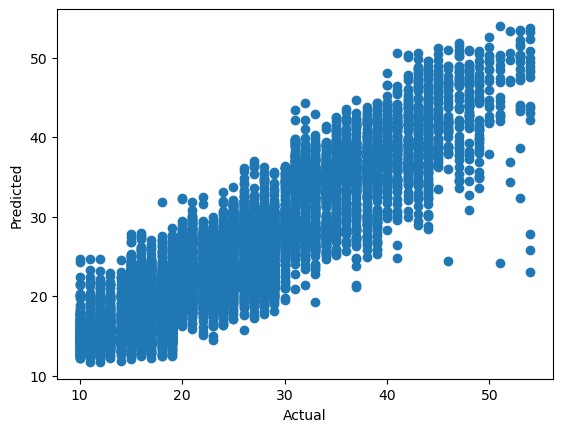

In [163]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

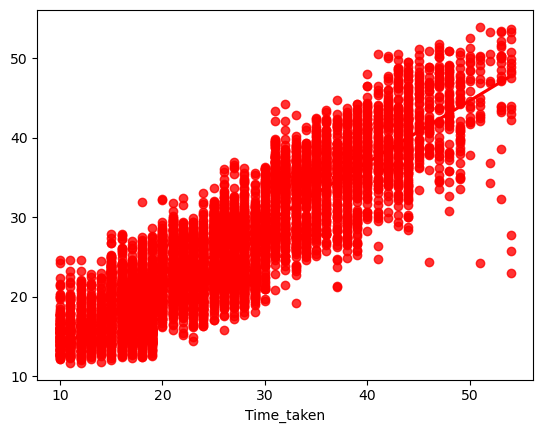

In [164]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [165]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
27809,20.0,26.530355,-6.530355
31399,49.0,35.113888,13.886112
11902,22.0,18.450239,3.549761
40435,13.0,18.933926,-5.933926
23458,16.0,20.508000,-4.508000
...,...,...,...
8426,14.0,16.726171,-2.726171
768,15.0,22.838946,-7.838946
28387,39.0,38.390639,0.609361
29028,34.0,28.014676,5.985324
